In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme()

In [2]:
df=pd.read_excel(r'D:\Data Analysis project 1\Customer Retention Case Study Data.xlsx')
df

,gender,age,gross_income,segment,num_credit_cards,active_inactive_start,active_inactive_end,num_products,num_loans,duration
0,M,21,79070.91,Individuals,0,I,0,1,0,1035
1,M,23,178270.68,College_Graduated,0,I,0,1,0,1097
2,M,24,31243.56,College_Graduated,0,I,1,1,0,1866
3,M,24,130740.54,College_Graduated,0,I,0,1,0,1440
4,M,31,112975.17,Individuals,0,I,0,0,0,376
...,...,...,...,...,...,...,...,...,...,...
54025,M,24,47237.01,College_Graduated,0,I,1,1,0,1147
54026,F,46,106930.05,Individuals,1,A,1,8,0,6061
54027,M,24,185323.05,College_Graduated,0,I,0,0,0,1817
54028,F,27,65246.79,College_Graduated,0,I,0,1,0,1447


# checking missing values

In [3]:
df.isna().sum()

gender                   0
age                      0
gross_income             0
segment                  0
num_credit_cards         0
active_inactive_start    0
active_inactive_end      0
num_products             0
num_loans                0
duration                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54030 entries, 0 to 54029
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 54030 non-null  object 
 1   age                    54030 non-null  int64  
 2   gross_income           54030 non-null  float64
 3   segment                54030 non-null  object 
 4   num_credit_cards       54030 non-null  int64  
 5   active_inactive_start  54030 non-null  object 
 6   active_inactive_end    54030 non-null  int64  
 7   num_products           54030 non-null  int64  
 8   num_loans              54030 non-null  int64  
 9   duration               54030 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 4.1+ MB


In [7]:
df.duplicated().sum()

1191

In [8]:
drop=df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.dtypes

gender                    object
age                        int64
gross_income             float64
segment                   object
num_credit_cards           int64
active_inactive_start     object
active_inactive_end        int64
num_products               int64
num_loans                  int64
duration                   int64
dtype: object

In [11]:
df.columns

Index(['gender', 'age', 'gross_income', 'segment', 'num_credit_cards',
       'active_inactive_start', 'active_inactive_end', 'num_products',
       'num_loans', 'duration'],
      dtype='object')

In [12]:
df['active_inactive_end'].replace({ 1 : 'A' , 0 : 'I'},inplace=True)

In [13]:
df

,gender,age,gross_income,segment,num_credit_cards,active_inactive_start,active_inactive_end,num_products,num_loans,duration
0,M,21,79070.91,Individuals,0,I,I,1,0,1035
1,M,23,178270.68,College_Graduated,0,I,I,1,0,1097
2,M,24,31243.56,College_Graduated,0,I,A,1,0,1866
3,M,24,130740.54,College_Graduated,0,I,I,1,0,1440
4,M,31,112975.17,Individuals,0,I,I,0,0,376
...,...,...,...,...,...,...,...,...,...,...
54024,M,24,75405.60,College_Graduated,0,I,I,1,0,1073
54025,M,24,47237.01,College_Graduated,0,I,A,1,0,1147
54026,F,46,106930.05,Individuals,1,A,A,8,0,6061
54028,F,27,65246.79,College_Graduated,0,I,I,1,0,1447


In [14]:
df.dtypes

gender                    object
age                        int64
gross_income             float64
segment                   object
num_credit_cards           int64
active_inactive_start     object
active_inactive_end       object
num_products               int64
num_loans                  int64
duration                   int64
dtype: object

# 1. What % of customers were active before the 6 months period. What was this % at the end of 6 months period?

In [15]:
miss=df['active_inactive_start']=='A'
miss.sum()

24504

In [16]:
# % of customers were active before the 6 months period
per=miss.mean().round(2)*100
per

46.0

In [17]:
miss.value_counts(normalize=True).round(2)*100

False    54.0
True     46.0
Name: active_inactive_start, dtype: float64

In [18]:
m=df['active_inactive_end']=='A'
m.sum()

24815

In [19]:
# % of customers were active at the end of 6 months period
pers=m.mean().round(2)*100
pers

47.0

In [20]:
m.value_counts(normalize=True).round(2)*100

False    53.0
True     47.0
Name: active_inactive_end, dtype: float64

In [21]:
# 1% of the customers are become active at the end of the 6 months period

# 2. Get the count of below customers: 


In [22]:
#I. Customers who remained active 
#II. Customers who remained inactive 
#III. Active customers who became inactive 
#IV. Inactive customers who became active

# I. Customers who remained active


In [23]:
active=df[(df['active_inactive_start']=='A') & (df['active_inactive_end']=='A')]
len(active)

22436

In [69]:
#segment
a=active['segment'].value_counts(normalize=True).to_frame().round(2)*100
a

,segment
Individuals,69.0
College_Graduated,21.0
VIP,11.0


<AxesSubplot:>

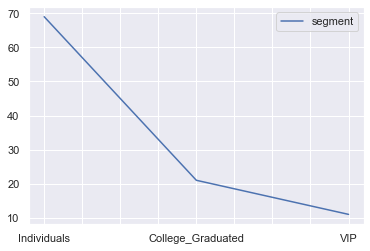

In [76]:
a.plot()

In [71]:
#gender
a1=active['gender'].value_counts(normalize=True).to_frame().round(2)*100
a1

,gender
F,58.0
M,42.0


<AxesSubplot:>

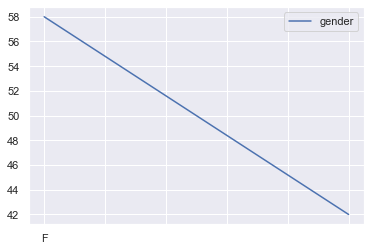

In [72]:
a1.plot()

# II. Customers who remained inactive 


In [26]:
inactive=df[(df['active_inactive_start']=='I' )& (df['active_inactive_end']=='I')]
len(inactive)

25956

In [27]:
inactive['segment'].value_counts(normalize=True).to_frame().round(2)*100

,segment
Individuals,52.0
College_Graduated,48.0
VIP,0.0


In [28]:
inactive['gender'].value_counts(normalize=True).to_frame().round(2)*100

,gender
F,52.0
M,48.0


# III. Active customers who became inactive 


In [29]:
active_inactive=df[(df['active_inactive_start']=='A')&(df['active_inactive_end']=='I')]
len(active_inactive)

2068

In [30]:
active_inactive['segment'].value_counts(normalize=True).to_frame().round(2)*100

,segment
Individuals,72.0
College_Graduated,26.0
VIP,1.0


In [31]:
active_inactive['gender'].value_counts(normalize=True).to_frame().round(2)*100

,gender
F,61.0
M,39.0


# IV. Inactive customers who became active


In [32]:
inactive_active=df[(df['active_inactive_start']=='I')&(df['active_inactive_end']=='A')]
len(inactive_active)

2379

In [33]:
inactive_active['segment'].value_counts(normalize=True).to_frame().round(2)*100

,segment
Individuals,60.0
College_Graduated,39.0
VIP,0.0


In [34]:
inactive_active['gender'].value_counts(normalize=True).to_frame().round(2)*100

,gender
F,53.0
M,47.0


In [35]:
cross=pd.crosstab(df['active_inactive_start'],df['active_inactive_end'])
cross

active_inactive_end,A,I
active_inactive_start,,
A,22436,2068
I,2379,25956


# 3. For the Four types of customers identified above, perform a comparison on the below metrics and report any significant difference 

In [36]:
#I. Average of gross income 
#II. Average of age 
#III. Average of duration 
#IV. Average of num_credit_cards 
#V. Average of num_loans

In [37]:
df.mean().round(2)

C:\Users\DELL\AppData\Local\Temp/ipykernel_10464/562376041.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean().round(2)


age                     40.78
gross_income        134268.72
num_credit_cards         0.05
num_products             1.54
num_loans                0.01
duration              2914.71
dtype: float64

In [38]:
active.mean().round(0)

C:\Users\DELL\AppData\Local\Temp/ipykernel_10464/4199346830.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  active.mean().round(0)


age                     44.0
gross_income        142453.0
num_credit_cards         0.0
num_products             3.0
num_loans                0.0
duration              3306.0
dtype: float64

In [39]:
inactive.mean().round(0)

C:\Users\DELL\AppData\Local\Temp/ipykernel_10464/1125279582.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inactive.mean().round(0)


age                     38.0
gross_income        128342.0
num_credit_cards         0.0
num_products             1.0
num_loans                0.0
duration              2561.0
dtype: float64

In [40]:
active_inactive.mean().round(0)

C:\Users\DELL\AppData\Local\Temp/ipykernel_10464/3903010688.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  active_inactive.mean().round(0)


age                     45.0
gross_income        132812.0
num_credit_cards         0.0
num_products             1.0
num_loans                0.0
duration              3418.0
dtype: float64

In [41]:
inactive_active.mean().round(0)

C:\Users\DELL\AppData\Local\Temp/ipykernel_10464/4160791955.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inactive_active.mean().round(0)


age                     40.0
gross_income        123011.0
num_credit_cards         0.0
num_products             1.0
num_loans                0.0
duration              2648.0
dtype: float64

# 4. For Female and Male customers, perform a similar comparison on the below metrics and report any significant difference: 

In [42]:
#I. Average of gross income 
#II. Average of age 
#III. Average of duration
#IV. Average of num_credit_cards 
#V. Average of num_loans

In [43]:
female=df[df['gender']=='F']
len(female)

29025

In [44]:
female.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,29025.0,42.70,16.77,2.00,27.00,42.00,53.00,112.0
gross_income,29025.0,135535.56,224134.56,2336.01,69943.89,103578.15,158686.47,17804048.1
num_credit_cards,29025.0,0.06,0.24,0.00,0.00,0.00,0.00,1.0
num_products,29025.0,1.63,1.67,0.00,1.00,1.00,2.00,13.0
num_loans,29025.0,0.01,0.11,0.00,0.00,0.00,0.00,1.0
duration,29025.0,3187.15,2091.54,366.00,1213.00,2914.00,5165.00,7909.0


In [45]:
male=df[df['gender']=='M']
len(male)

23814

In [46]:
male.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,23814.0,38.44,17.44,2.00,24.00,34.00,48.00,111.00
gross_income,23814.0,132724.68,261871.52,5340.93,67153.09,99132.51,153222.74,28894395.51
num_credit_cards,23814.0,0.04,0.19,0.00,0.00,0.00,0.00,1.00
num_products,23814.0,1.42,1.46,0.00,1.00,1.00,2.00,13.00
num_loans,23814.0,0.01,0.08,0.00,0.00,0.00,0.00,1.00
duration,23814.0,2582.67,1896.14,366.00,1073.00,1777.00,4063.00,7884.00


# 5. For customers of different segments (College, Individual,…), perform a similar comparison on the below metrics and report any significant difference:

In [47]:
#VI. Average of gross income 
#VII. Average of age 
#VIII. Average of duration 
#IX. Average of num_credit_cards 
#X. Average of num_loans

In [48]:
clg=df[df['segment']=='College_Graduated']
len(clg)

18510

In [49]:
clg.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,18510.0,24.41,3.44,20.0,22.00,24.00,26.00,72.00
gross_income,18510.0,115790.89,170355.94,6313.2,60778.46,87939.02,132189.73,13268621.28
num_credit_cards,18510.0,0.01,0.09,0.0,0.00,0.00,0.00,1.00
num_products,18510.0,1.03,0.75,0.0,1.00,1.00,1.00,11.00
num_loans,18510.0,0.00,0.01,0.0,0.00,0.00,0.00,1.00
duration,18510.0,1260.56,639.32,366.0,776.00,1144.00,1518.00,7809.00


In [50]:
individuals=df[df['segment']=='Individuals']
len(individuals)

31904

In [51]:
individuals.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,31904.0,49.17,15.08,2.00,40.00,46.0,57.00,112.00
gross_income,31904.0,141498.59,266835.23,2336.01,72967.01,108177.4,164656.22,28894395.51
num_credit_cards,31904.0,0.06,0.24,0.00,0.00,0.0,0.00,1.00
num_products,31904.0,1.63,1.64,0.00,1.00,1.0,2.00,12.00
num_loans,31904.0,0.01,0.12,0.00,0.00,0.0,0.00,1.00
duration,31904.0,3756.48,1945.13,366.00,2056.75,3895.0,5357.00,7909.00


In [52]:
vip=df[df['segment']=='VIP']
len(vip)

2425

In [53]:
vip.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,2425.0,55.44,13.40,20.00,45.00,53.00,64.00,100.00
gross_income,2425.0,180191.59,333373.22,11730.66,95005.02,141059.82,202808.13,11139895.56
num_credit_cards,2425.0,0.21,0.41,0.00,0.00,0.00,0.00,1.00
num_products,2425.0,4.19,2.41,0.00,2.00,4.00,6.00,13.00
num_loans,2425.0,0.02,0.16,0.00,0.00,0.00,0.00,1.00
duration,2425.0,4466.27,2031.20,368.00,2958.00,4986.00,5982.00,7878.00


In [54]:
s=df.segment

In [55]:
s.value_counts()

Individuals          31904
College_Graduated    18510
VIP                   2425
Name: segment, dtype: int64

In [56]:
s.value_counts(normalize=True).round(2)
    

Individuals          0.60
College_Graduated    0.35
VIP                  0.05
Name: segment, dtype: float64

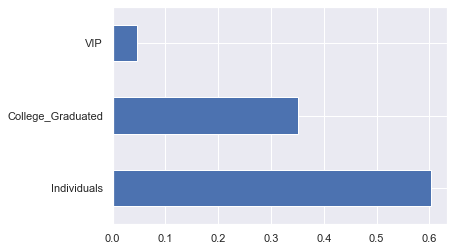

In [57]:
df['segment'].value_counts(normalize=True).plot(kind='barh');

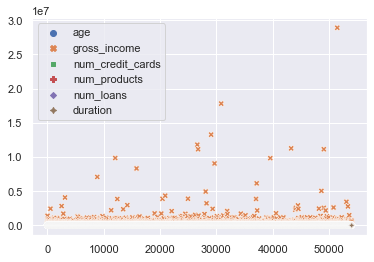

In [106]:
sns.scatterplot(data=df);

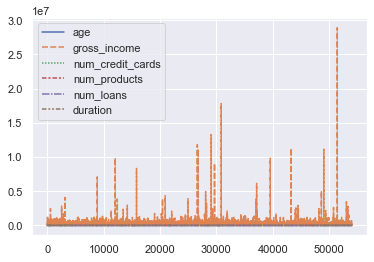

In [107]:
sns.lineplot(data=df);

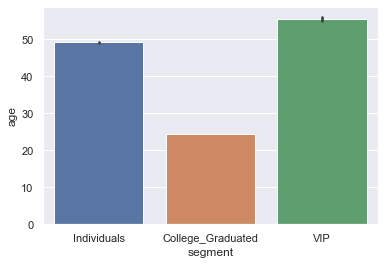

In [105]:
sns.barplot(x=df['segment'],y=df['age']);

In [108]:
#outliers

<AxesSubplot:xlabel='age', ylabel='segment'>

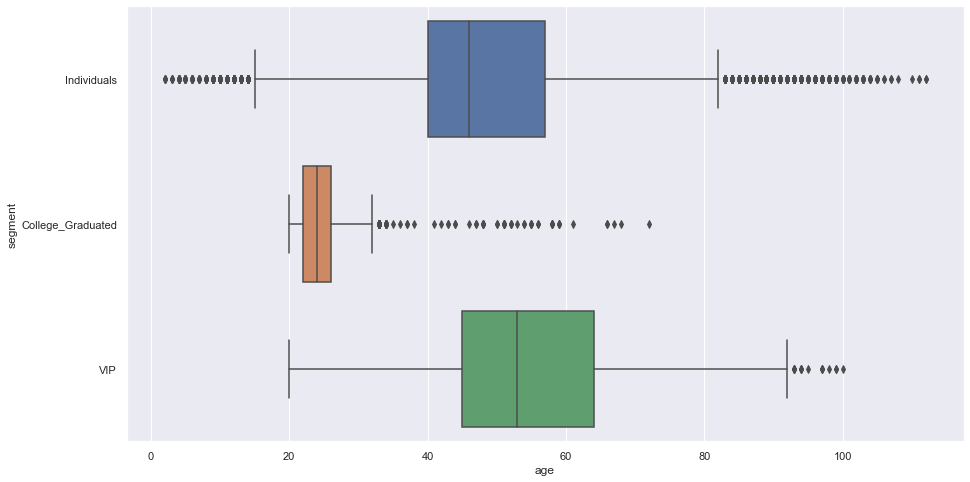

In [113]:
plt.figure(figsize=(15,8))
sns.boxplot(y=df['segment'],x=df['age'])

In [92]:
#29,025 females
#23,814 male
percentage=df.groupby(['gender','segment']).size().to_frame()

<AxesSubplot:ylabel='gender,segment'>

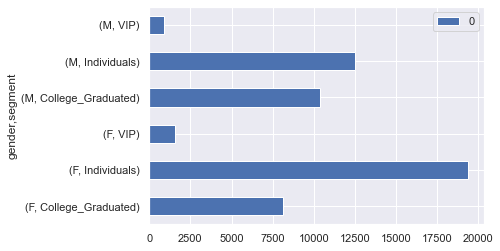

In [100]:
percentage.plot.barh()

In [60]:
df.groupby(['gender']).size().to_frame()

,0
gender,
F,29025
M,23814


# 6. For each of the segments (College, Individual,…), find out the % of customers who: 

In [61]:
#I. Who remained active 
#II. Who remained inactive 
#III. Who became inactive 
#IV. Who became active

In [83]:
#start
p=pd.crosstab(df['segment'],df['active_inactive_start'],normalize='all').round(2)*100
p

active_inactive_start,A,I
segment,,
College_Graduated,10.0,25.0
Individuals,32.0,28.0
VIP,5.0,0.0


<AxesSubplot:xlabel='segment'>

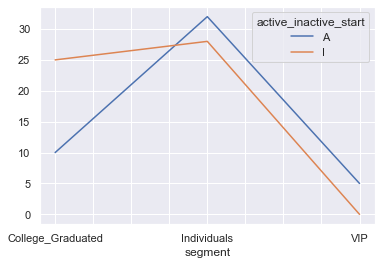

In [84]:
p.plot()

In [81]:
#end
p1=pd.crosstab(df['segment'],df['active_inactive_end'],normalize='all').round(2)*100
p1

active_inactive_end,A,I
segment,,
College_Graduated,11.0,25.0
Individuals,32.0,28.0
VIP,5.0,0.0


<AxesSubplot:xlabel='segment'>

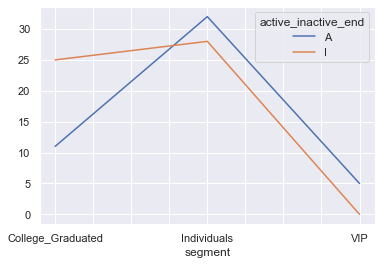

In [82]:
p1.plot()

In [64]:
X=df['active_inactive_start'].values
y=df['duration'].values

In [65]:
print(X.shape)
print(y.shape)

(52839,)
(52839,)


In [88]:
from pandas_profiling import ProfileReport

In [90]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]